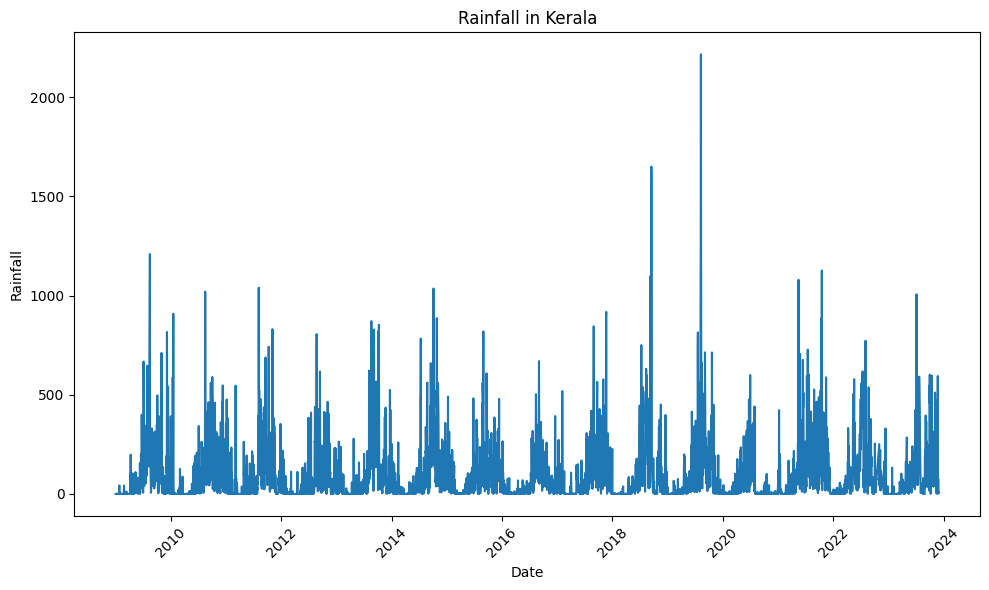

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('../states_cumulative/Kerala.csv')
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Average'], linestyle='-')
plt.title('Rainfall in Kerala')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Grouping by year

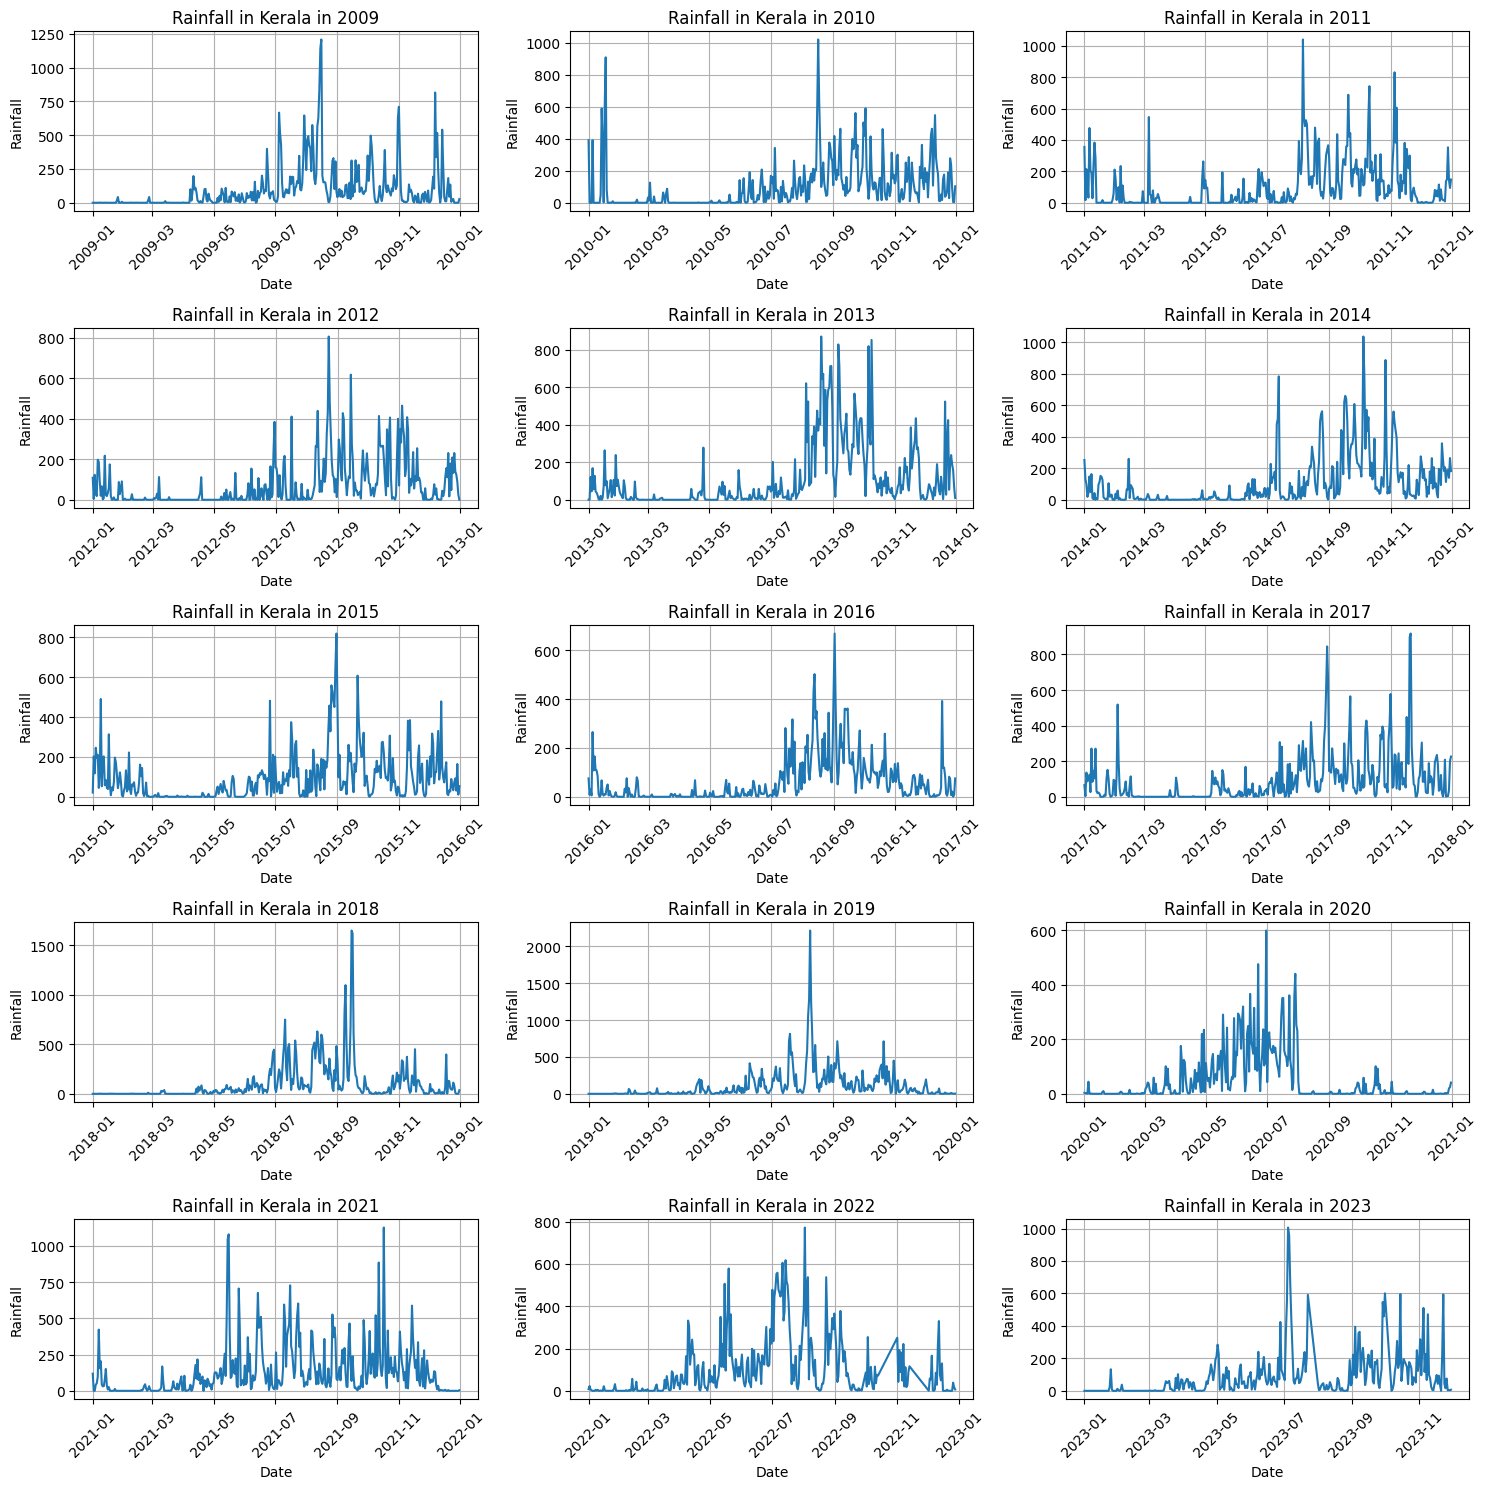

In [2]:
year_group = df.groupby(df['Date'].dt.year)
num_years = len(year_group)
num_cols = 3
fig,axes = plt.subplots(nrows = 5,ncols=num_cols,figsize=(15,len(year_group)))


for i,(year,group) in enumerate(year_group):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row,col] if len(year_group) > 1 else axes[col]
    ax.plot(group['Date'], group['Average'], linestyle='-')
    ax.set_title(f'Rainfall in Kerala in {year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Rainfall')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()

Grouping by Month window and determining the trend

In [ ]:
import numpy as np

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
grouped_data = df.groupby(['Year', 'Month'])
num_years = len(grouped_data)
num_cols = 4
kerala_trends=[]
fig, axes = plt.subplots(nrows=45, ncols = 4, figsize=(40, 3*len(grouped_data)))

for i, ((year, month), group) in enumerate(grouped_data):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row,col] if len(grouped_data) > 1 else axes[col]
    group = group.reset_index(drop=True)
    ax.plot(group['Average'], marker='o')
    
    slopes = np.gradient(group['Average'])
    avg = np.mean(slopes).round(2)
    trends_arr = [1 if slope > 0 else 0 for slope in slopes]
    ci = trends_arr.count(1)
    cd = trends_arr.count(0)
    if (ci>cd and avg>0) or (ci!=cd and avg>0) :
        trend = 'Increasing'
    elif (ci<cd and avg<0) or (ci!=cd and avg<0):
        trend = 'Decreasing'
    else :
        trend = 'No Change'

    kerala_trends.append({'Year': year, 'Month': month, 'Slope': avg, 'Trend': trend})

    ax.set_title(f'Average in Kerala - {year}-{month}, Slope: {avg:.2f}, Trend: {trend}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Average')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)


plt.show()

In [7]:
# print(kerala_trends)
#count the number of increasing decreasing and no change
increasing = 0
decreasing = 0
no_change = 0
for trend in kerala_trends:
    if trend['Trend'] == 'Increasing':
        increasing += 1
    elif trend['Trend'] == 'Decreasing':
        decreasing += 1
    else:
        no_change += 1

print(f'Number of increasing trends: {increasing}')
print(f'Number of decreasing trends: {decreasing}')
print(f'Number of no change trends: {no_change}')

Number of increasing trends: 71
Number of decreasing trends: 84
Number of no change trends: 24


In [5]:
import numpy as np
data = df[(df['Date'].dt.year == 2020) & (df['Date'].dt.month == 6)]
data = data.reset_index(drop=True)


slopes = np.gradient(data['Average'])
print(slopes)
trends = ['Increasing' if slope > 0 else 'Decreasing' for slope in slopes]
#calculate the number of increasing trend
num_increasing = sum([1 for trend in trends if trend == 'Increasing'])
print(num_increasing)
#calculate the number of decreasing trend
num_decreasing = sum([1 for trend in trends if trend == 'Decreasing'])
print(num_decreasing)
#calculate the average of slopes
average_slope = np.mean(slopes)
print(average_slope)

[ 153.63988162   72.83715667  -12.54077701  -60.66180781   -0.72779396
   77.48380821  -82.98609681 -155.6963808   -30.21638546  106.27121115
  103.63639997  -69.96191056   58.8332403    54.6196406   -95.36107976
  -21.76806294   69.78328077  -28.94254585  -73.70585678   -2.53973511
  153.96468661   17.188218   -233.14544724  -10.02060764   67.06517435
   68.99122837  -19.85766325  -60.29262223  247.60298921  483.31404339]
14
16
25.89353953363333


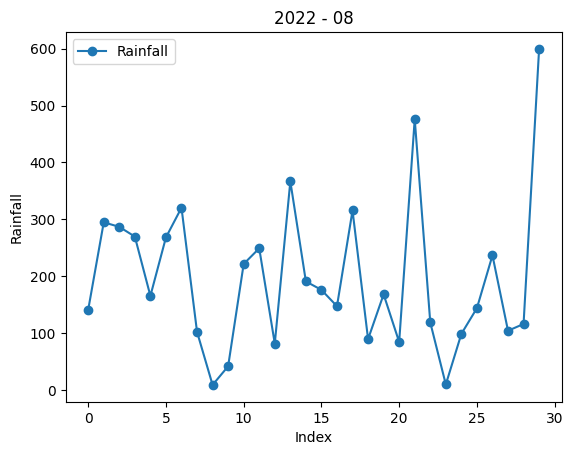

In [6]:
plt.plot(data['Average'], marker='o', label = 'Rainfall')
plt.xlabel('Index')
plt.ylabel('Rainfall')
plt.title('2022 - 08')
plt.legend()
plt.show()